In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 200

In [36]:
dataset_path = 'dataset_LP_1.txt' # dataset_LP_2.csv

In [38]:
pos_df, neg_df = [features for c, features in df.groupby(df.columns[-1])]
features = {}

features["pos"] = pos_df.drop([df.columns[-1]], axis=1).to_numpy()
features["neg"] = neg_df.drop([df.columns[-1]], axis=1).to_numpy()

In [39]:
features["pos"].shape, features["neg"].shape

((762, 4), (610, 4))

In [19]:
df = pd.read_csv(dataset_path, header=None)
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [26]:
# pos_df, neg_df = [features for c, features in df.groupby(df.columns[-1])]

# features = {}

# features["pos"] = pos_df.drop([df.columns[-1]], axis=1).to_numpy()
# features["neg"] = neg_df.drop([df.columns[-1]], axis=1).to_numpy()

In [25]:
# features["pos"].shape, features["neg"].shape

((762, 4), (610, 4))

In [16]:
df.shape

(1372, 5)

In [14]:
df.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Text(0.5, 1.0, 'Axis [1,1]')

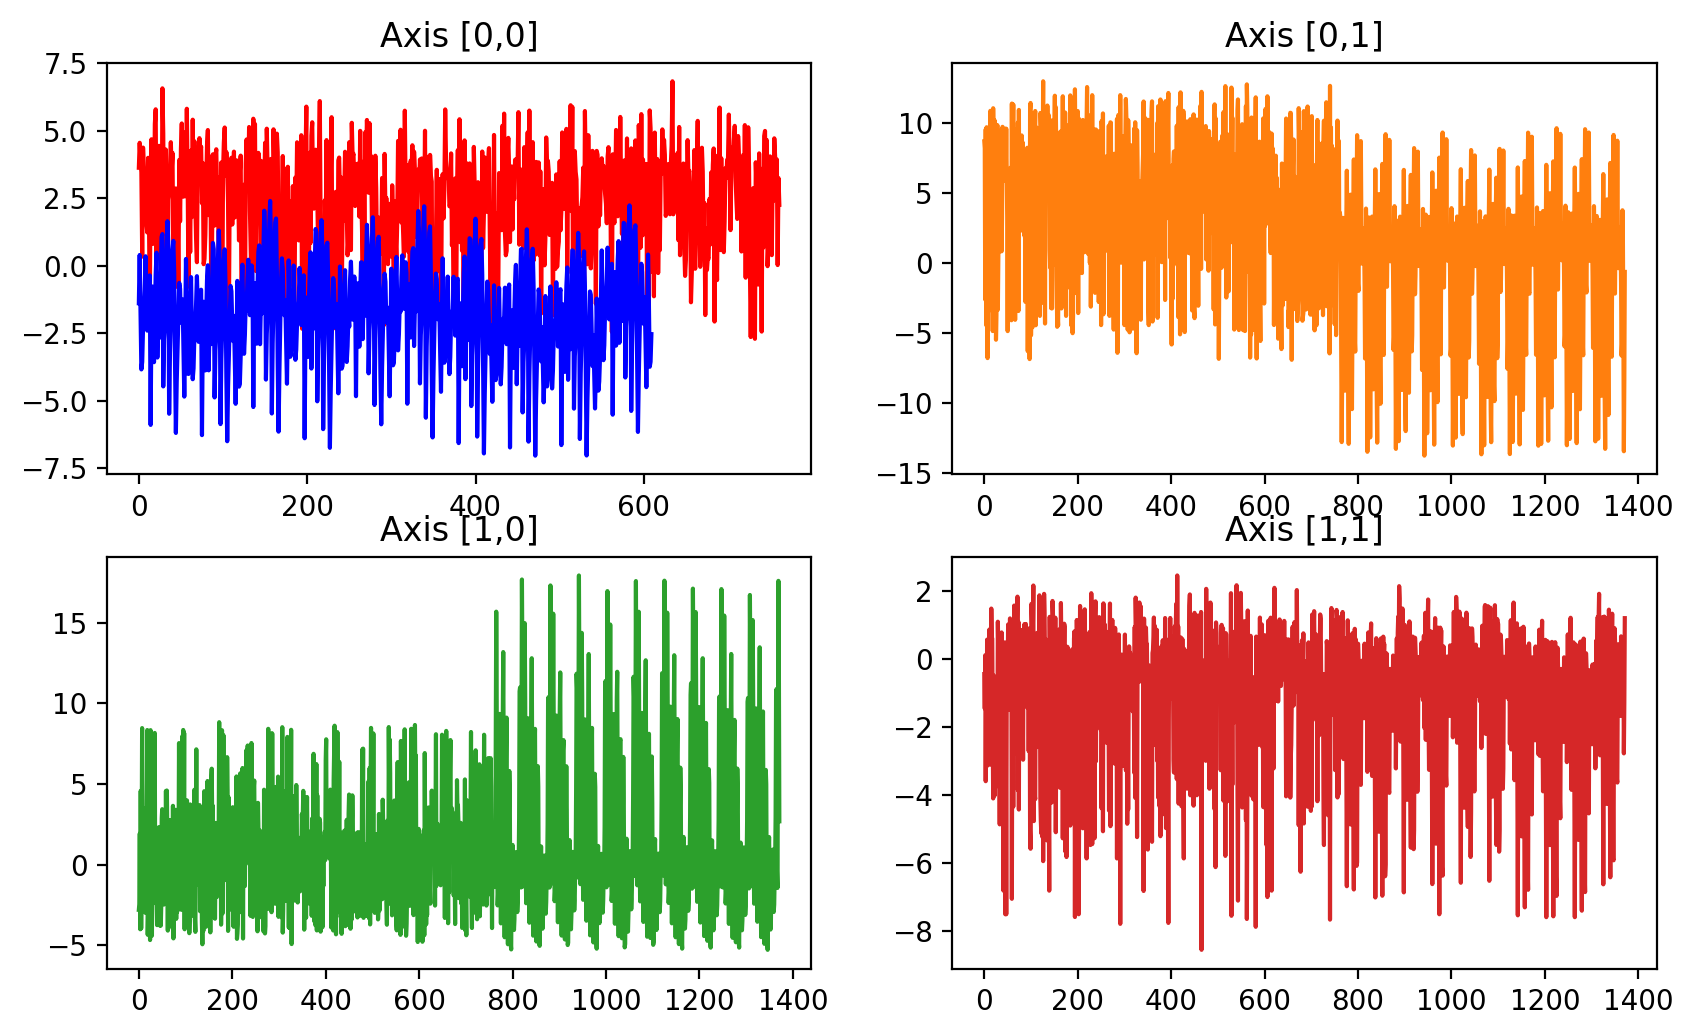

In [42]:
fig, axs = plt.subplots(2, 2)

POS_COLOR = [1, 0, 0]
NEG_COLOR = [0, 0, 1]

axs[0, 0].plot(features["pos"][:, 0], color=POS_COLOR)
axs[0, 0].plot(features["neg"][:, 0], color=NEG_COLOR)
axs[0, 0].set_title('Axis [0,0]')

axs[0, 1].plot(features["pos"][:, 1], color=POS_COLOR)
axs[0, 1].plot(features["neg"][:, 1], color=NEG_COLOR)
axs[0, 1].set_title('Axis [0,0]')

axs[1, 0].plot(features["pos"][:, 2], color=POS_COLOR)
axs[1, 0].plot(features["neg"][:, 0], color=NEG_COLOR)
axs[1, 0].set_title('Axis [0,0]')

axs[1, 1].plot(features["pos"][:, 0], color=POS_COLOR)
axs[1, 1].plot(features["neg"][:, 0], color=NEG_COLOR)
axs[1, 1].set_title('Axis [0,0]')

axs[0, 1].plot(df.iloc[:, 1], 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')

axs[1, 0].plot(df.iloc[:, 2], 'tab:green')
axs[1, 0].set_title('Axis [1,0]')

axs[1, 1].plot(df.iloc[:, 3], 'tab:red')
axs[1, 1].set_title('Axis [1,1]')
